1차원 함수의 수치 미분

In [65]:
def f(x):
    return x**2

def analytical_d(x):
    return 2*x

def num_d_forward(f,x,h=1e-5):
    return (f(x+h)-f(x))/h

def num_d_backward(f,x,h=1e-5):
    return (f(x)-f(x-h))/h

def num_d_central(f,x,h=1e-5):
    return (f(x+h) -f(x-h))/(2*h)

In [66]:
x = 3
print(num_d_forward(f,x))
print(num_d_backward(f,x))
print(num_d_central(f,x))
print(analytical_d(x))




6.000009999951316
5.999990000127297
6.000000000039306
6


### 다변수 함수의 수치 미분

In [67]:
# 편미분
import numpy as np
def f(x,y):
    return x**2 + y**2

def partial_d(f,x,y,var='x',h=1e-5):
    if var == 'x':
        return (f(x+h,y)-f(x-h,y))/(2*h)
    elif var == 'y':
        return (f(x,y+h)-f(x,y-h))/(2*h)
    
print(partial_d(f,3.0,2.0,'x'))
print(partial_d(f,3.0,2.0,'y'))

6.000000000039306
4.000000000026205


In [68]:
def f_multi(x):
    return np.sum(x**2)

def num_d_gradient(f,x,h=1e-5):
    grad = np.zeros_like(x)
    for idx in range(len(x)):
        tmp = x[idx]
        x[idx] = tmp + h
        f_plus = f(x)
        
        x[idx] = tmp - h
        f_minus = f(x)
        grad[idx] = (f_plus - f_minus) / (2*h)
        x[idx] = tmp
    return grad

print(num_d_gradient(f_multi,np.array([3.0,4.0])))



[6. 8.]


# 간단한 신경망의 기울기

In [69]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def forward_pass(x,params):
    w1,b1,w2,b2 = params
    z1 =np.dot(x,w1) + b1
    r1 = sigmoid(z1)
    z2 = np.dot(r1,w2) + b2
    r2 =   sigmoid(z2)
    return r2
  
def loss(r2,y):
    return 0.5 * np.sum((r2-y)*2)

def get_loss(params,x,y):
    r2 = forward_pass(x,params)
    return loss(r2,y)

def num_d_gradient_params(f,params,x,y,h=1e-5):
    grads = []
    for param in params:
        grad = np.zeros_like(param)
        iter = np.nditer(param,flags=['multi_index'],op_flags=['readwrite'])

        while not iter.finished:
            idx = iter.multi_index
            origin_val = param[idx]
            param[idx] = origin_val + h
            f_plus = f(params,x,y)
            param[idx] = origin_val - h
            f_minus = f(params,x,y)
            grad[idx] = (f_plus - f_minus) / (2*h)
            param[idx] = origin_val
            iter.iternext()
        grads.append(grad)
    return grads
np.random.seed(0)
input_size = 2
hidden_size = 3
output_size = 1

w1 = np.random.randn(input_size,hidden_size)
b1 = np.random.randn(hidden_size)
w2 = np.random.randn(hidden_size,output_size)
b2 = np.random.randn(output_size)

params = [w1,b1,w2,b2]

x = np.array([0.5,-0.2])
y = np.array([1.0])


num_grads = num_d_gradient_params(get_loss,params,x,y)



            
for i,grad in enumerate(num_grads):
    print(f'{i}번째 파라미터 수치 미분 기울기:\n{grad}\n')
            
        
    

0번째 파라미터 수치 미분 기울기:
[[ 0.00324082  0.00172796  0.01647664]
 [-0.00129633 -0.00069118 -0.00659066]]

1번째 파라미터 수치 미분 기울기:
[0.00648164 0.00345592 0.03295329]

2번째 파라미터 수치 미분 기울기:
[[0.07878037]
 [0.04133083]
 [0.06319562]]

3번째 파라미터 수치 미분 기울기:
[0.09852197]



# 값에 따른 영향

In [70]:
def f(x):
    return x**2

def analytical_d(x):
    return 2*x

def num_d_central(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)


x = 3.0
h_values = np.logspace(-10,-1,50)
errors =[]

true_d = analytical_d(x)

for h in h_values:
    num_d = num_d_central(f,x,h)
    error = np.abs(true_d - num_d)
    errors.append(error)
errors



[np.float64(4.964422259945422e-07),
 np.float64(1.7934854383838683e-06),
 np.float64(5.6576068008240554e-06),
 np.float64(1.2668532507476016e-06),
 np.float64(1.6826849069673244e-07),
 np.float64(1.1526886520840662e-06),
 np.float64(1.2464285026325683e-06),
 np.float64(7.551179139753117e-07),
 np.float64(4.2921768805825877e-07),
 np.float64(9.130039391180844e-08),
 np.float64(1.6006203562568544e-07),
 np.float64(1.0115348469952323e-07),
 np.float64(5.540784275837041e-08),
 np.float64(3.6160781036187473e-09),
 np.float64(3.20947632914681e-08),
 np.float64(1.6841083194663042e-08),
 np.float64(1.2369500979048098e-09),
 np.float64(7.966750814603074e-09),
 np.float64(2.268608412236972e-09),
 np.float64(4.2692764878893286e-09),
 np.float64(6.870948254800169e-10),
 np.float64(1.391859072441548e-09),
 np.float64(3.561488881587138e-10),
 np.float64(4.889129101570688e-10),
 np.float64(4.718767598888007e-10),
 np.float64(2.312328106768291e-10),
 np.float64(8.79438744050276e-11),
 np.float64(1.956

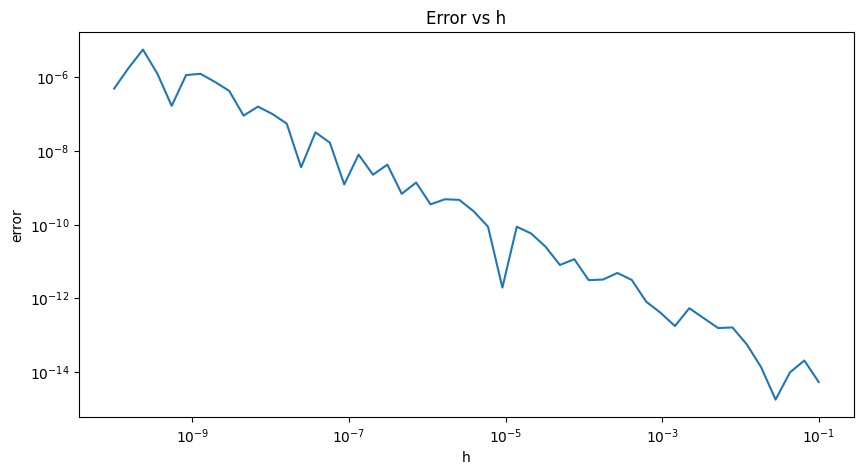

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.loglog(h_values,errors)
plt.xlabel('h')
plt.ylabel('error')
plt.title('Error vs h')
plt.show()


# 자동 미분

In [72]:
import torch

x = torch.tensor(3.0,requires_grad=True)
y =f(x)
y.backward()

print(analytical_d(x))
print(x.grad)

        

tensor(6., grad_fn=<MulBackward0>)
tensor(6.)
